In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

#import API key
from api_keys import weather_api_key

from citipy import citipy

output_data_file = "../cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)
weather_api_key

'73514c69c8cbd750eb54702ffab7cd2f'

## Generate City List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


594

## API CALLS

In [3]:
foundcities = []
lat = []
temp = []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key
for city in cities:
    try: 
        response = requests.get(url + "&q=" + city).json()
#         pprint(response)
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        foundcities.append(city)
    except:
        pprint(f"{city} not found")
        pass
# print(f"Found cities were: {foundcities}")
# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")

'nizhneyansk not found'
'samusu not found'
'barentsburg not found'
'amderma not found'
'taolanaro not found'
'palabuhanratu not found'
'duz not found'
'saryshagan not found'
'louisbourg not found'
'karkaralinsk not found'
'mys shmidta not found'
'ruatoria not found'
'tasbuget not found'
'illoqqortoormiut not found'
'saleaula not found'
'skagastrond not found'
'attawapiskat not found'
'mouzakion not found'
'sentyabrskiy not found'
'calategas not found'
'grand river south east not found'
'warqla not found'
'yithion not found'
'tsihombe not found'
'belushya guba not found'
'fort saint john not found'
'burica not found'
'stoyba not found'
'vaitupu not found'
'sotara not found'
'ust-kamchatsk not found'
'ngukurr not found'
'kamenskoye not found'
'mocambique not found'
'malwan not found'
'sorvag not found'
'sahrak not found'
'atka not found'
'viligili not found'
'macaboboni not found'
'tumannyy not found'
'khormuj not found'
'satitoa not found'
'novotalitsy not found'
'tanjong malim not foun

## Scatter Plots

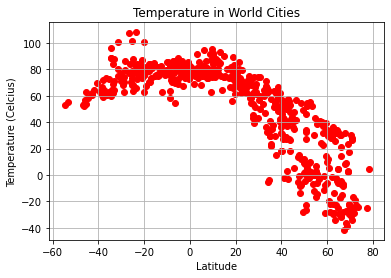

 This plot is analyzing the relationship between cities and how their latitude affects typical temperature in the area.


In [4]:

weather_dict = {
    "city": foundcities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o", color = "r")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celcius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()
print(f' This plot is analyzing the relationship between cities and how their latitude affects typical temperature in the area.' )

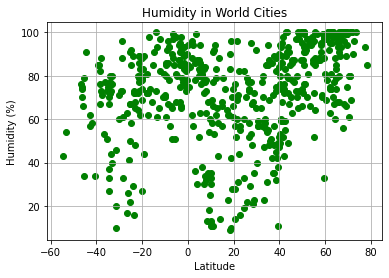

 This plot is analyzing the relationship between cities and how their latitude affects typical humidity in the area.


In [5]:
hum = []

for city in foundcities:
    response = requests.get(url + "&q=" + city).json()
    hum.append(response['main']['humidity'])
        
humidity_dict = {
    "city": foundcities,
    "lat": lat,
    "humidity": hum
}
humidity_data = pd.DataFrame(humidity_dict)
plt.scatter(humidity_data["lat"], humidity_data["humidity"], marker="o", color = "g")
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")
plt.show()
print(f' This plot is analyzing the relationship between cities and how their latitude affects typical humidity in the area.' )

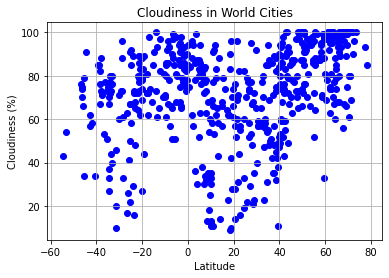

 This plot is analyzing the relationship between cities and how their latitude affects typical cloudiness in the area.


In [6]:
clouds = []

for city in foundcities:
    response = requests.get(url + "&q=" + city).json()
    clouds.append(response['clouds']['all'])
        
clouds_dict = {
    "city": foundcities,
    "lat": lat,
    "cloudiness": clouds
}
clouds_data = pd.DataFrame(humidity_dict)
plt.scatter(clouds_data["lat"], clouds_data["humidity"], marker="o", color = "b")
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("CloudinessInWorldCities.png")
plt.show()
print(f' This plot is analyzing the relationship between cities and how their latitude affects typical cloudiness in the area.' )

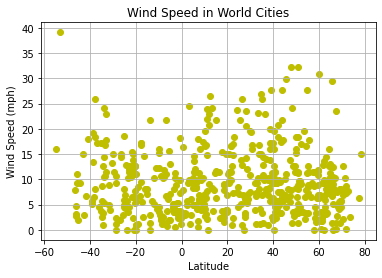

 This plot is analyzing the relationship between cities and how their latitude affects typical wind speeds in the area.


In [7]:
wind = []

for city in foundcities:
    response = requests.get(url + "&q=" + city).json()
    wind.append(response['wind']['speed'])
        
wind_dict = {
    "city": foundcities,
    "lat": lat,
    "wind speed": wind
}
wind_data = pd.DataFrame(wind_dict)
plt.scatter(wind_data["lat"], wind_data["wind speed"], marker="o", color = "y")
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("WindSpeedInWorldCities.png")
plt.show()
print(f' This plot is analyzing the relationship between cities and how their latitude affects typical wind speeds in the area.' )

## Linear Regressions

In [8]:
northernCity = []
northernLats = []
northernTemp = []
northernHumidity = []
northernClouds = []
northernWind = []

southernCity = []
southernLats = []
southernTemp = []
southernHumidity = []
southernClouds = []
southernWind = []

for city in foundcities:
    response = requests.get(url + "&q=" + city).json()
    if response['coord']['lat'] >= 0:
        northernCity.append(city)
        northernLats.append(int(response['coord']['lat']))
        northernTemp.append(int(response['main']['temp']))
        northernHumidity.append(int(response['main']['humidity']))
        northernClouds.append(int(response['clouds']['all']))
        northernWind.append(int(response['wind']['speed']))
    else:
        southernCity.append(city)
        southernLats.append(int(response['coord']['lat']))
        southernTemp.append(int(response['main']['temp']))
        southernHumidity.append(int(response['main']['humidity']))
        southernClouds.append(int(response['clouds']['all']))
        southernWind.append(int(response['wind']['speed']))
        
print (f' The Northern Cities are: {northernCity}\n and the Southern Cities are {southernCity}')


 The Northern Cities are: ['cleethorpes', 'port hardy', 'albany', 'santa marta', 'homer', 'san patricio', 'san carlos', 'la ronge', 'longyearbyen', 'egvekinot', 'khatanga', 'tavda', 'northam', 'kapaa', 'nikolskoye', 'panan', 'torbay', 'leningradskiy', 'caborca', 'bathsheba', 'qaanaaq', 'clyde river', 'saint-augustin', 'tuktoyaktuk', 'lata', 'bull savanna', 'butaritari', 'lesnoye', 'cayenne', 'fairbanks', 'hilo', 'helong', 'balkanabat', 'torremolinos', 'jamestown', 'vila franca do campo', 'yellowknife', 'cherskiy', 'provideniya', 'mubi', 'mandera', 'ribeira grande', 'narsaq', 'bandarbeyla', 'tasiilaq', 'cascais', 'barabinsk', 'puerto madero', 'san ramon', 'kodiak', 'sorland', 'riyadh', 'aklavik', 'raga', 'rosaryville', 'methoni', 'nicoya', 'worthington', 'dapaong', 'laguna', 'victoria', 'verkhoyansk', 'saint george', 'dikson', 'faya', 'esil', 'hovd', 'hasaki', 'bethel', 'cabo san lucas', 'sioux lookout', 'inta', 'dingle', 'bhag', 'sur', 'turukhansk', 'yumen', 'huntingdon', 'iskateley', 

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7416478999075719


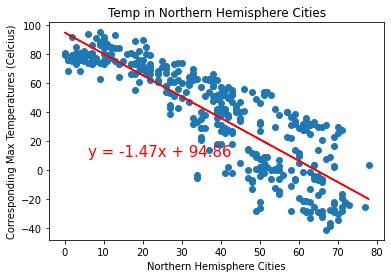

In [19]:
x_values = np.array(northernLats)
y_values = northernTemp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.title("Temp in Northern Hemisphere Cities")
plt.savefig("TemperatureInNorthernCities.png")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Cities')
plt.ylabel('Corresponding Max Temperatures (Celcius)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.19413441275587423


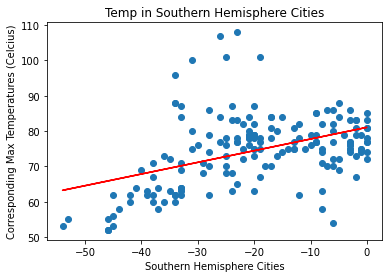

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = np.array(southernLats)
y_values = southernTemp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title("Temp in Southern Hemisphere Cities")
plt.savefig("TemperatureInSouthernCities.png")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Cities')
plt.ylabel('Corresponding Max Temperatures (Celcius)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("TemperatureInSouthernCities.png")

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22616259983076517


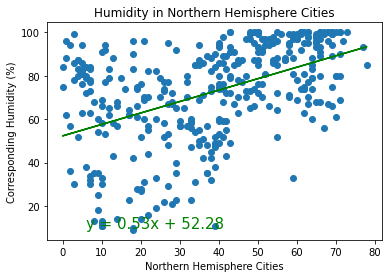

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = np.array(northernLats)
y_values = northernHumidity 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title("Humidity in Northern Hemisphere Cities")
plt.savefig("HuidityInNorthernCities.png")
plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel('Northern Hemisphere Cities')
plt.ylabel('Corresponding Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("HuidityInNorthernCities.png")

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15459000362877445


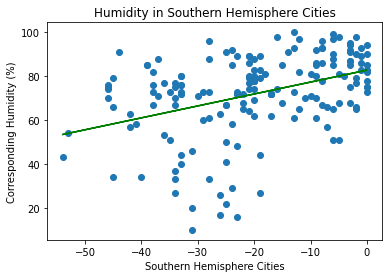

In [22]:
x_values = np.array(southernLats)
y_values = southernHumidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title("Humidity in Southern Hemisphere Cities")
plt.savefig("HuidityInSouthernCities.png")
plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel('Southern Hemisphere Cities')
plt.ylabel('Corresponding Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05248479677807973


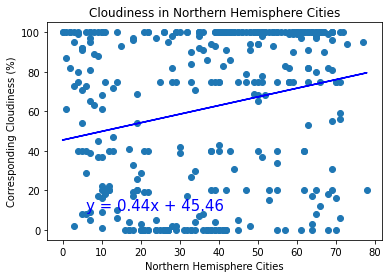

In [23]:
x_values = np.array(northernLats)
y_values = northernClouds
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.savefig("CloudinessInNorthernHemisphere.png")
plt.title('Cloudiness in Northern Hemisphere Cities')
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Northern Hemisphere Cities')
plt.ylabel('Corresponding Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19413441275587423


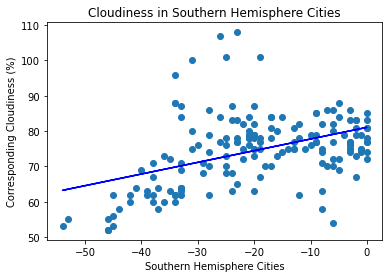

In [24]:
x_values = np.array(southernLats)
y_values = southernTemp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.savefig("CloudinessInSouthernCities.png")
plt.title('Cloudiness in Southern Hemisphere Cities')
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Southern Hemisphere Cities')
plt.ylabel('Corresponding Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005276133495469696


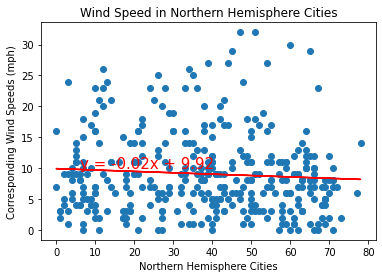

In [25]:
x_values = np.array(northernLats)
y_values = northernWind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.savefig("WindSpeedInNorthernCities.png")
plt.title('Wind Speed in Northern Hemisphere Cities')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Cities')
plt.ylabel('Corresponding Wind Speeds (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08812389587018402


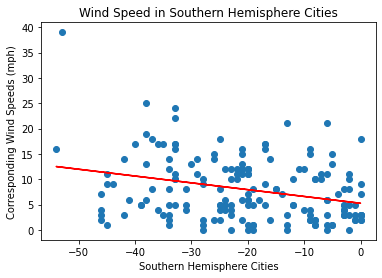

In [28]:
x_values = np.array(southernLats)
y_values = southernWind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.savefig("WindSpeedInSouthernCities.png")
plt.title('Wind Speed in Southern Hemisphere Cities')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Southern Hemisphere Cities')
plt.ylabel('Corresponding Wind Speeds (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
